In [9]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
from avro import schema, datafile, io
from avro.datafile import DataFileReader
from avro.io import DatumReader
!python3 --version

Python 3.9.18


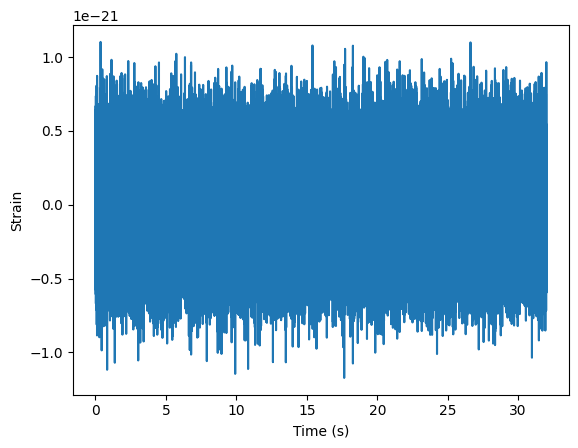

In [10]:
# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 32 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(32 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

pp.plot(ts.sample_times, ts)
pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.show()

Sample times:  [0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 3.19992676e+01
 3.19995117e+01 3.19997559e+01]


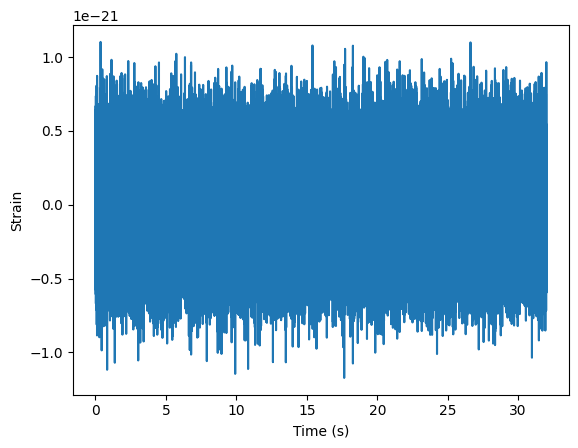

In [11]:
sample = 32  # duration of the noise
sample_size = int(sample / delta_t)
ts = pycbc.noise.noise_from_psd(length=sample_size, delta_t=delta_t, psd=psd, seed=127)

pp.plot(ts.sample_times, ts)
pp.ylabel("Strain")
pp.xlabel("Time (s)")
print("Sample times: ", (ts.sample_times))

In [12]:
# CREATE THE SAMPLES

length = 2  # in seconds
long = int(length / delta_t)

overlap_percent = 1 - (50 / 100)
index = int(long * overlap_percent)

start = 0

avro_schema = schema.Parse(
    """
    {
        "type": "record",
        "name": "TimeSeriesData",
        "fields": [
            {"name": "timestamp", "type": "double"},
            {"name": "value", "type": "double"}
        ]
    }
"""
)

for i in range(len(ts) // index - 1):

    new_array = ts[start : start + long]
    start += index
    timestamps = new_array.sample_times
    values = new_array

    with open(f"noise_samples/time_series_{i}.avro", "wb") as f:
        # Create a data writer using the Avro schema
        writer = datafile.DataFileWriter(f, io.DatumWriter(), avro_schema)

        # Write each data point to the Avro file
        for timestamp, value in zip(timestamps, values):
            writer.append({"timestamp": timestamp, "value": value})

In [13]:
# PRINT THE .AVRO FILES

with open("noise_samples/time_series_0.avro", "rb") as f:
    # Create a data reader
    reader = DataFileReader(f, DatumReader())

    # Iterate over each record in the file
    for record in reader:
        # Access the data
        timestamp = record["timestamp"]
        value = record["value"]

        # Do something with the data...
        print(f"Timestamp: {timestamp}, Value: {value}")

    # Close the reader
    reader.close()

Timestamp: 0.0, Value: 6.639692919925146e-22
Timestamp: 0.000244140625, Value: -8.410491751357973e-23
Timestamp: 0.00048828125, Value: -2.313664690060681e-23
Timestamp: 0.000732421875, Value: 8.685182456987688e-23
Timestamp: 0.0009765625, Value: -1.9855193444576404e-23
Timestamp: 0.001220703125, Value: 2.6944588952415196e-22
Timestamp: 0.00146484375, Value: -2.0946402400097033e-22
Timestamp: 0.001708984375, Value: -6.431024114212541e-23
Timestamp: 0.001953125, Value: -3.6379012763488285e-23
Timestamp: 0.002197265625, Value: 4.4328477463157e-22
Timestamp: 0.00244140625, Value: -1.7950501071878113e-22
Timestamp: 0.002685546875, Value: -2.394343461823727e-22
Timestamp: 0.0029296875, Value: 3.711043031952077e-22
Timestamp: 0.003173828125, Value: -4.407510640569567e-24
Timestamp: 0.00341796875, Value: 2.8708734730582616e-22
Timestamp: 0.003662109375, Value: -3.2200918793136764e-22
Timestamp: 0.00390625, Value: 3.4459628082678447e-22
Timestamp: 0.004150390625, Value: -2.274054743968912e-22
T

In [14]:
# Open the Avro file
with open("noise_samples/time_series_30.avro", "rb") as f:
    # Create a data reader
    reader = DataFileReader(f, DatumReader())

    # Iterate over each record in the file
    for record in reader:
        # Access the data
        timestamp = record["timestamp"]
        value = record["value"]

        # Do something with the data...
        print(f"Timestamp: {timestamp}, Value: {value}")

    # Close the reader
    reader.close()

Timestamp: 30.0, Value: 7.759323777830264e-23
Timestamp: 30.000244140625, Value: 1.4460000076445833e-22
Timestamp: 30.00048828125, Value: 6.301550349634389e-23
Timestamp: 30.000732421875, Value: 1.790913892028176e-22
Timestamp: 30.0009765625, Value: -5.668082812991196e-22
Timestamp: 30.001220703125, Value: 3.042946369961382e-22
Timestamp: 30.00146484375, Value: -2.688638366536805e-22
Timestamp: 30.001708984375, Value: -6.029901604606658e-22
Timestamp: 30.001953125, Value: 4.501747058726297e-22
Timestamp: 30.002197265625, Value: 2.8456179668006206e-22
Timestamp: 30.00244140625, Value: 9.8913773313509e-24
Timestamp: 30.002685546875, Value: -2.178246284901691e-22
Timestamp: 30.0029296875, Value: 7.03510098740696e-23
Timestamp: 30.003173828125, Value: -9.50052090952016e-23
Timestamp: 30.00341796875, Value: -5.214046335177485e-22
Timestamp: 30.003662109375, Value: 2.989647312907415e-22
Timestamp: 30.00390625, Value: -7.39551381791347e-23
Timestamp: 30.004150390625, Value: 4.9708874317651185